In [1]:
import gdal
import skimage
import numpy as np
import cv2
from tqdm import tqdm
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data, io,data_dir,filters, feature
from skimage.color import label2rgb
import skimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
stride=512
image_size=stride
IMG_SET=['2016']
predir=r'D:\Python\seg-data\data_MB/'
g_count = 0
for n in tqdm(range(len(IMG_SET))):
    tif_img = gdal.Open(predir+IMG_SET[n]+'.tif')
    label_img=cv2.imread(predir+IMG_SET[n]+'.png',cv2.IMREAD_GRAYSCALE)
    tif_w = tif_img.RasterXSize #栅格矩阵的列数
    tif_h = tif_img.RasterYSize
    tif_data = tif_img.ReadAsArray(0,0,tif_w,tif_h)
    tif_d = tif_data.shape[0]
    tif_data = np.array(tif_data, dtype=float)
    image = cv2.merge(tif_data)
    h,w,_ = image.shape
        

100%|██████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.68it/s]


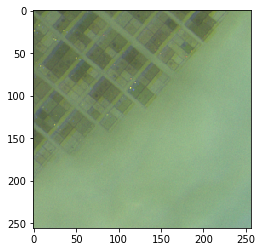

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
merged_im=cv2.merge(tif_data[0:3,1000:1256,1000:1256])
max_pixel=np.max(merged_im)
merged_im=merged_im/max_pixel
plt.imshow(merged_im)
plt.imsave('original_im.png',merged_im)

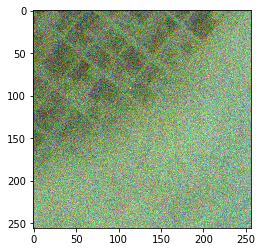

In [3]:
noise_im = skimage.util.random_noise(merged_im, mode='gaussian')
plt.imshow(noise_im)
plt.imsave('noise_im.png',noise_im)

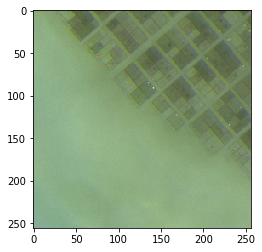

In [4]:
fliped_imh = cv2.flip(merged_im, 1)#水平翻转
plt.imshow(fliped_imh )
plt.imsave('fliped_imh.png',fliped_imh)



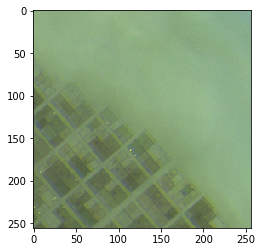

In [5]:

fliped_imv = cv2.flip(merged_im, 0)#水平翻转
plt.imshow(fliped_imv )
plt.imsave('fliped_imv.png',fliped_imv)

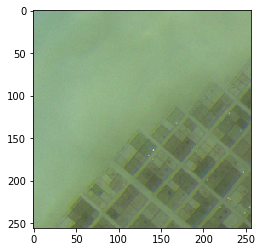

In [6]:

fliped_imhv = cv2.flip(merged_im, -1)#水平翻转
plt.imshow(fliped_imhv )
plt.imsave('fliped_imhv.png',fliped_imhv)

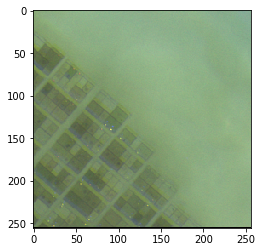

In [7]:
M=cv2.getRotationMatrix2D((127,127), 90, 1)
rotated_im90 = cv2.warpAffine(merged_im, M, (256, 256))
plt.imshow(rotated_im90 )
plt.imsave('rotated_im90.png',rotated_im90 )

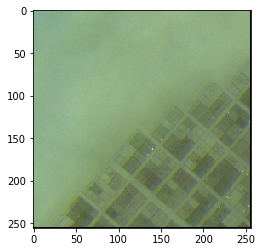

In [8]:
M=cv2.getRotationMatrix2D((127,127), 180, 1)
rotated_im180 = cv2.warpAffine(merged_im, M, (256, 256))
plt.imshow(rotated_im180 )
plt.imsave('rotated_im180.png',rotated_im180)

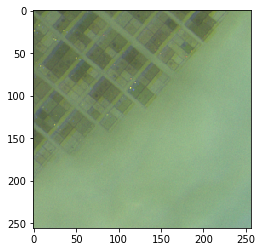

In [9]:
# settings for LBP
radius = 1  # LBP算法中范围半径的取值
n_points = 8 * radius # 领域像素点数
#image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(merged_im)

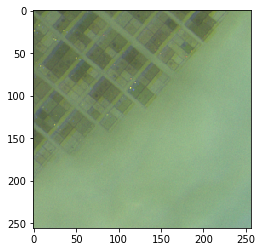

In [10]:

plt.subplot(111)
plt.imshow(merged_im, plt.cm.gray)

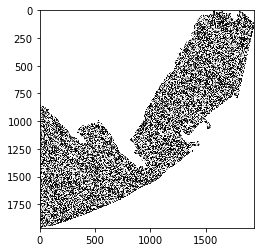

In [19]:
#merged_im = np.concatenate(merged_im, axis=0)
lbp = local_binary_pattern(tif_data[0],8,1)
plt.subplot(111)
plt.imshow(lbp, plt.cm.gray)
plt.imsave('lbp.png',lbp )

In [ ]:
merged_im.shape